# 4.1 Retailer Data
## 4.1.1 Simulating Customer Data

In [1]:
set.seed(21821)
ncust <- 1000
cust.df <- data.frame(cust.id=as.factor(c(1:ncust)))

In [2]:
cust.df$age <- rnorm(n=ncust, mean=35, sd=5)
cust.df$credit.score <- rnorm(n=ncust, mean=3*cust.df$age+620, sd=50)
cust.df$email <- factor(sample(c("yes","no"),size=ncust, replace=TRUE,prob=c(0.8,0.2)))
cust.df$distance.to.store <- exp(rnorm(n=ncust, mean=2, sd=1.2))
summary(cust.df)

    cust.id         age         credit.score   email     distance.to.store 
 1      :  1   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 2      :  1   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 3      :  1   Median :35.10   Median :725.5             Median :  7.1317  
 4      :  1   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 5      :  1   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 6      :  1   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
 (Other):994                                                               

## Simulating Online and In-Store Sales Data

In [3]:
cust.df$online.visits <- rnbinom(ncust, size=0.3, 
                                 mu=15+ifelse(cust.df$email=="yes",15,0)-0.7*(cust.df$age-median(cust.df$age)))

In [4]:
# ネットで買う人の情報
cust.df$online.trans <- rbinom(ncust, size=cust.df$online.visits, prob=0.3)
cust.df$online.spend <- exp(rnorm(ncust, mean=3, sd=0.1))*cust.df$online.trans

In [5]:
# お店で買う人の情報
cust.df$store.trans <- rnbinom(ncust, size=5, mu=3/sqrt(cust.df$distance.to.store))
cust.df$store.spend <- exp(rnorm(ncust, mean=3.5, sd=0.4))* cust.df$store.trans

In [6]:
summary(cust.df)

    cust.id         age         credit.score   email     distance.to.store 
 1      :  1   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 2      :  1   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 3      :  1   Median :35.10   Median :725.5             Median :  7.1317  
 4      :  1   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 5      :  1   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 6      :  1   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
 (Other):994                                                               
 online.visits     online.trans      online.spend      store.trans    
 Min.   :  0.00   Min.   :  0.000   Min.   :   0.00   Min.   : 0.000  
 1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:   0.00   1st Qu.: 0.000  
 Median :  6.00   Median :  2.000   Median :  37.03   Median : 1.000  
 Mean   : 28.29   Mean   :  8.385   Mean   : 170.32   Mean   : 1.323  
 3rd Qu.: 31.00   3rd Qu.:  9.000   3

## 4.1.3 Simulating Satisfaction Survey Responses

In [7]:
sat.overall <- rnorm(ncust, mean=3.1, sd=0.7)
summary(sat.overall)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.617   2.632   3.087   3.100   3.569   5.293 

In [8]:
sat.service <- floor(sat.overall + rnorm(ncust, mean=0.5, sd=0.4))
sat.selection <- floor(sat.overall + rnorm(ncust, mean=-0.2, sd=0.6))
summary(cbind(sat.service, sat.selection))

  sat.service    sat.selection   
 Min.   :0.000   Min.   :-1.000  
 1st Qu.:3.000   1st Qu.: 2.000  
 Median :3.000   Median : 2.000  
 Mean   :3.106   Mean   : 2.404  
 3rd Qu.:4.000   3rd Qu.: 3.000  
 Max.   :6.000   Max.   : 5.000  

In [9]:
sat.service[sat.service > 5] <- 5
sat.service[sat.service < 1] <- 1
sat.selection[sat.selection > 5] <- 5
sat.selection[sat.selection < 1] <- 1 
summary(cbind(sat.service,sat.selection))

  sat.service    sat.selection  
 Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:2.000  
 Median :3.000   Median :2.000  
 Mean   :3.106   Mean   :2.426  
 3rd Qu.:4.000   3rd Qu.:3.000  
 Max.   :5.000   Max.   :5.000  

## 4.1.4 Simulating Non-Response Data

In [10]:
no.response <- as.logical(rbinom(ncust, size=1, prob=cust.df$age/100))
sat.service[no.response] <- NA
sat.selection[no.response] <- NA
summary(cbind(sat.service, sat.selection))

  sat.service   sat.selection  
 Min.   :1.00   Min.   :1.000  
 1st Qu.:3.00   1st Qu.:2.000  
 Median :3.00   Median :2.000  
 Mean   :3.07   Mean   :2.401  
 3rd Qu.:4.00   3rd Qu.:3.000  
 Max.   :5.00   Max.   :5.000  
 NA's   :341    NA's   :341    

In [11]:
cust.df$sat.service <- sat.service
cust.df$sat.selection <- sat.selection
summary(cust.df)

    cust.id         age         credit.score   email     distance.to.store 
 1      :  1   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 2      :  1   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 3      :  1   Median :35.10   Median :725.5             Median :  7.1317  
 4      :  1   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 5      :  1   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 6      :  1   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
 (Other):994                                                               
 online.visits     online.trans      online.spend      store.trans    
 Min.   :  0.00   Min.   :  0.000   Min.   :   0.00   Min.   : 0.000  
 1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:   0.00   1st Qu.: 0.000  
 Median :  6.00   Median :  2.000   Median :  37.03   Median : 1.000  
 Mean   : 28.29   Mean   :  8.385   Mean   : 170.32   Mean   : 1.323  
 3rd Qu.: 31.00   3rd Qu.:  9.000   3

In [12]:
 write.csv(cust.df, "./custdf-Ch4.csv", quote=TRUE, row.names=FALSE)

# 4.2 Exploring Associations Between Variables with Scatterplots

In [12]:
str(cust.df)
# email は登録しているかのフラグ
# 

'data.frame':	1000 obs. of  12 variables:
 $ cust.id          : Factor w/ 1000 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ age              : num  22.9 28 35.9 30.5 38.7 ...
 $ credit.score     : num  631 749 733 830 734 ...
 $ email            : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 1 1 ...
 $ distance.to.store: num  2.58 48.18 1.29 5.25 25.04 ...
 $ online.visits    : num  20 121 39 1 35 1 1 48 0 14 ...
 $ online.trans     : int  3 39 14 0 11 1 1 13 0 6 ...
 $ online.spend     : num  58.4 756.9 250.3 0 204.7 ...
 $ store.trans      : num  4 0 0 2 0 0 2 4 0 3 ...
 $ store.spend      : num  140.3 0 0 95.9 0 ...
 $ sat.service      : num  3 3 NA 4 1 NA 3 2 4 3 ...
 $ sat.selection    : num  3 3 NA 2 1 NA 3 3 2 2 ...


## 4.2.1 Creating a Basic Scatterplot with plot()

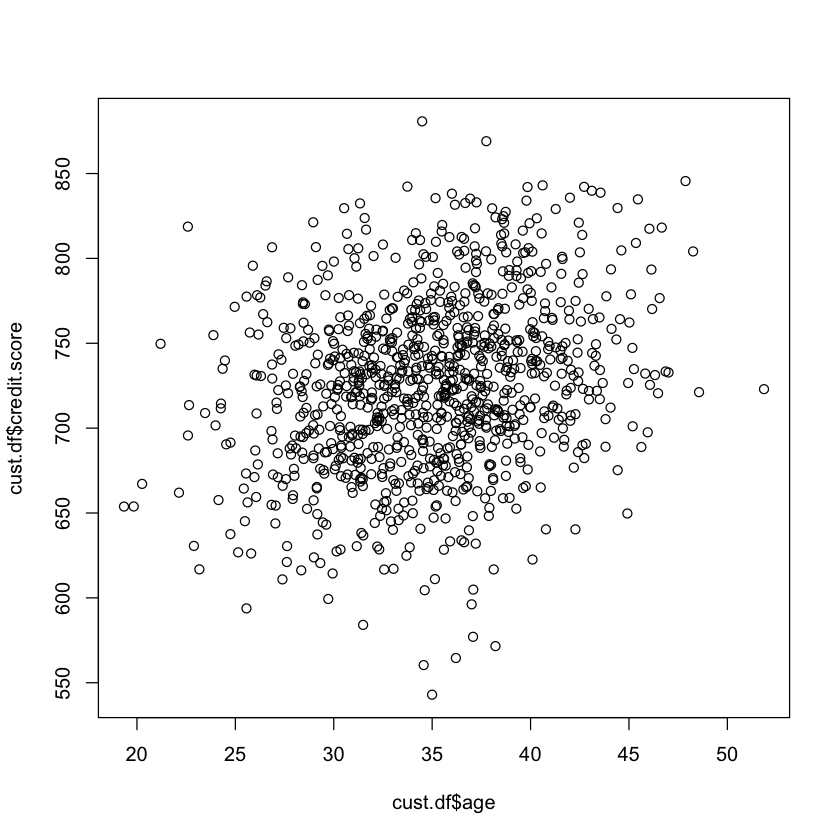

In [13]:
plot(x=cust.df$age, y=cust.df$credit.score)

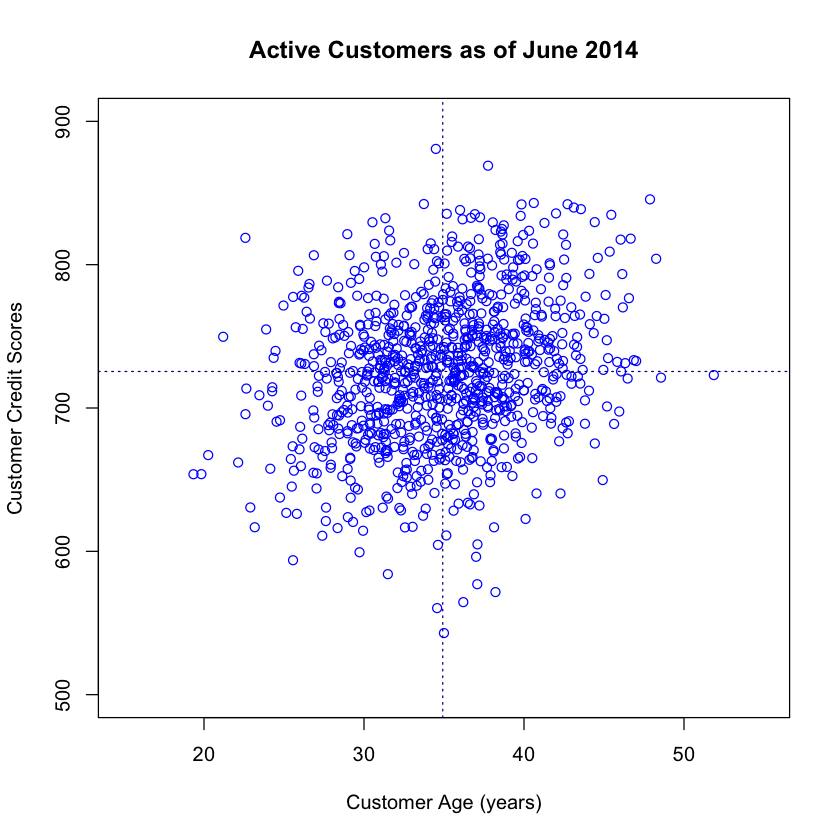

In [14]:
plot(cust.df$age, cust.df$credit.score, col="blue", 
    xlim=c(15,55),ylim=c(500,900),
    main="Active Customers as of June 2014",
    xlab="Customer Age (years)", ylab="Customer Credit Scores")
abline(h=mean(cust.df$credit.score), col="dark blue", lty="dotted")
abline(v=mean(cust.df$age), col="dark blue", lty="dotted")

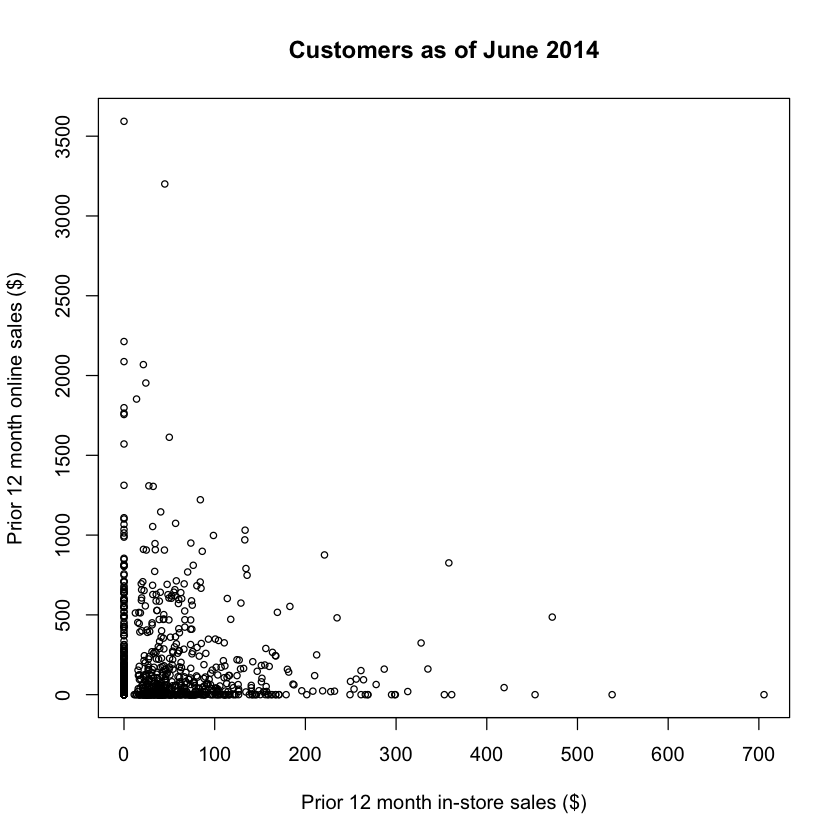

In [15]:
plot(cust.df$store.spend, cust.df$online.spend,
    main="Customers as of June 2014",
    xlab="Prior 12 month in-store sales ($)", ylab="Prior 12 month online sales ($)",
    cex=0.7)

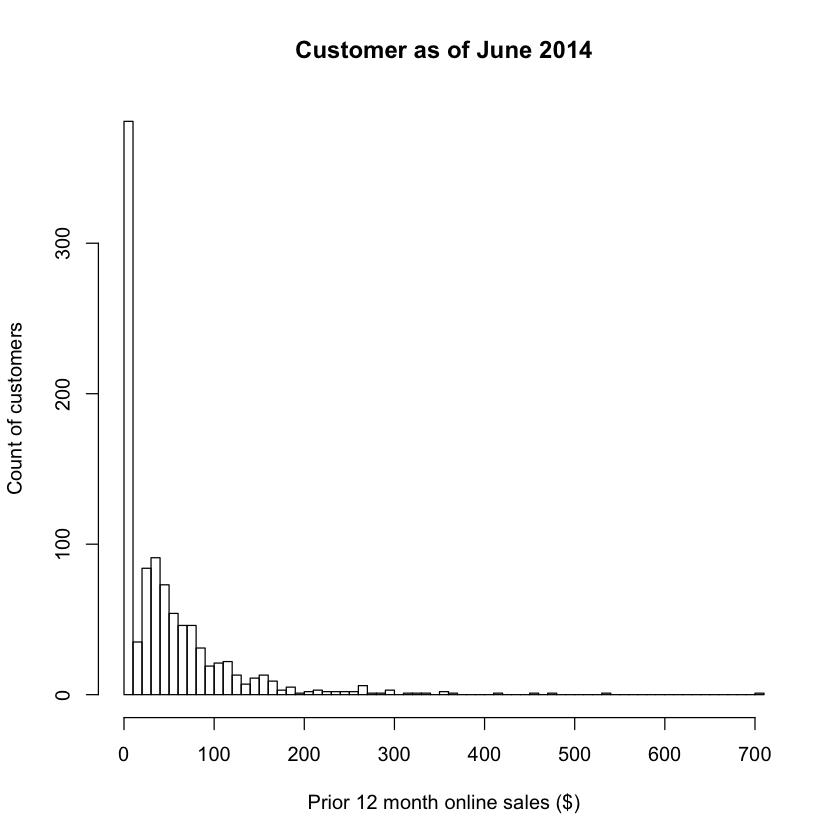

In [16]:
hist(cust.df$store.spend,
    breaks=(0:ceiling(max(cust.df$store.spend)/10))*10,
    main="Customer as of June 2014",
    xlab="Prior 12 month online sales ($)",
    ylab="Count of customers")

## 4.2.2 Color-Coding Points on a Scatterplot

In [17]:
my.col <- c("black","green")
my.pch <- c(1,19)

head(cust.df$email)
as.numeric(head(cust.df$email))

[1] yes yes yes yes no  yes
Levels: no yes

[1] 2 2 2 2 1 2

In [18]:
my.col[as.numeric(head(cust.df$email))]

[1] "green" "green" "green" "green" "black" "green"

In [19]:
my.col[head(cust.df$email)]

[1] "green" "green" "green" "green" "black" "green"

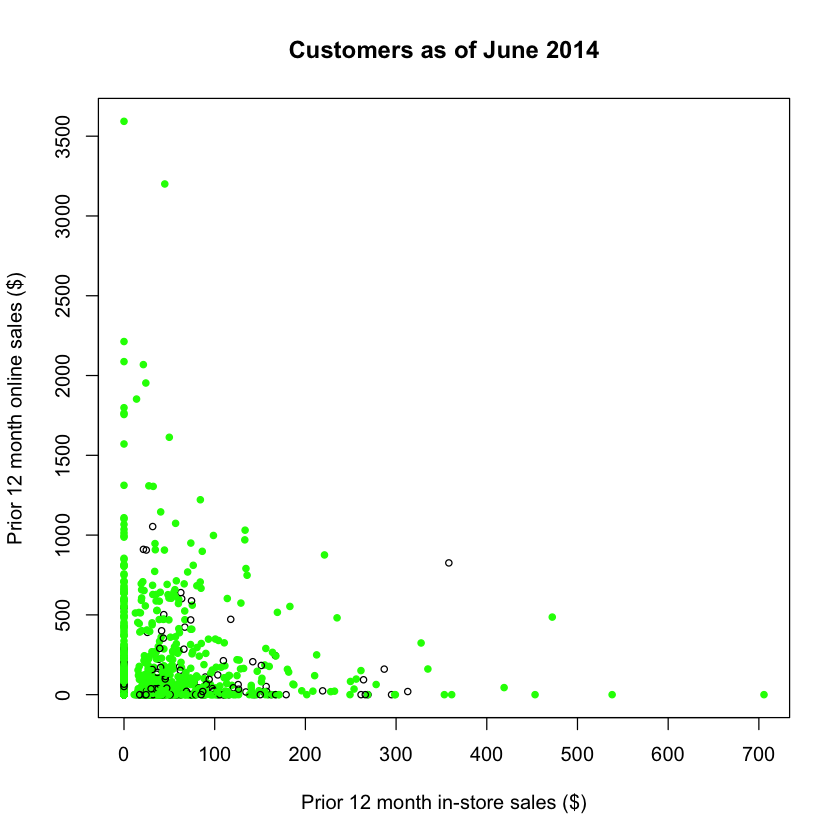

In [20]:
plot(cust.df$store.spend, cust.df$online.spend,
     cex=0.7,
     col=my.col[cust.df$email], pch=my.pch[cust.df$email],
    main="Customers as of June 2014",
    xlab="Prior 12 month in-store sales ($)", ylab="Prior 12 month online sales ($)")

## 4.2.3 Adding a Legend to a Plot

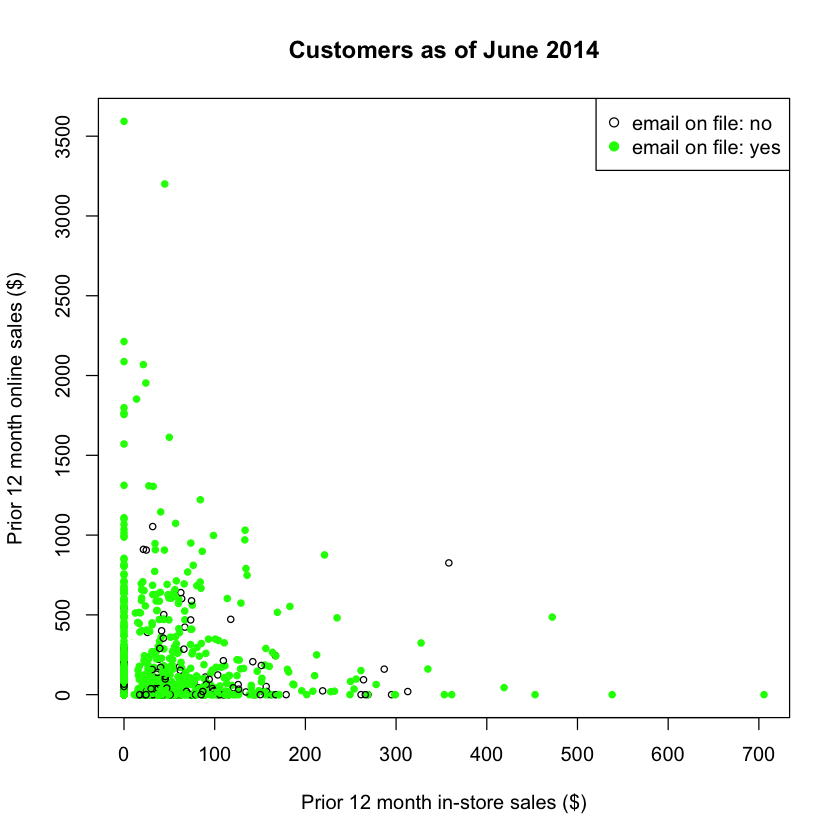

In [21]:
plot(cust.df$store.spend, cust.df$online.spend,
     cex=0.7,
     col=my.col[cust.df$email], pch=my.pch[cust.df$email],
    main="Customers as of June 2014",
    xlab="Prior 12 month in-store sales ($)", ylab="Prior 12 month online sales ($)")
legend(x="topright",legend=paste("email on file:", levels(cust.df$email)), col=my.col, pch=my.pch)

## 4.2.4 Plotting on a Log Scale

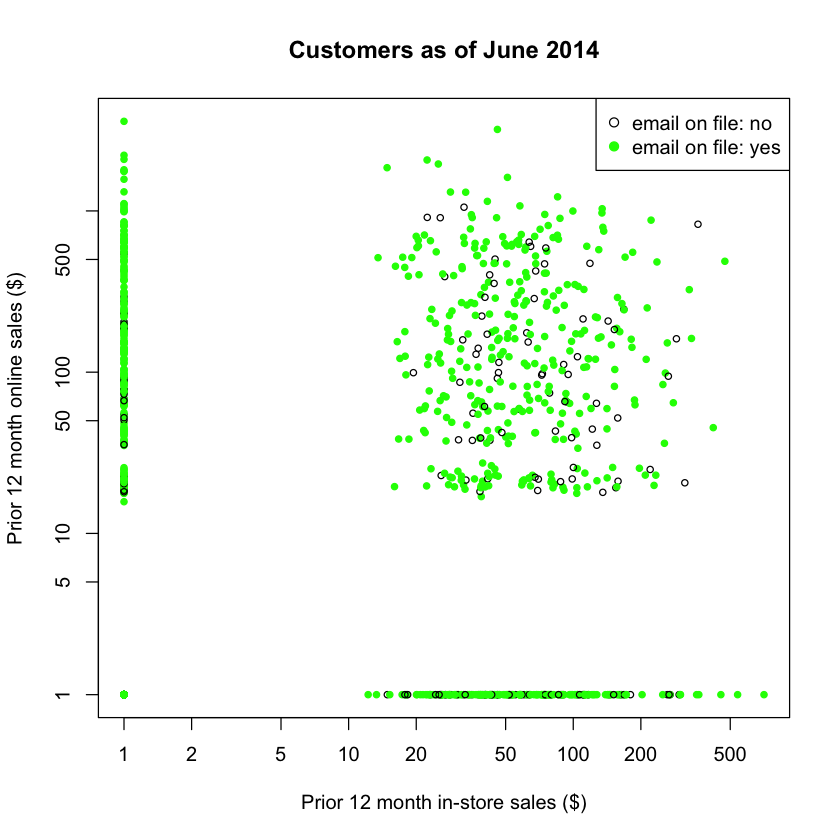

In [22]:
plot(cust.df$store.spend+1 , cust.df$online.spend+1,
     log="xy",cex=0.7,
     col=my.col[cust.df$email], pch=my.pch[cust.df$email],
    main="Customers as of June 2014",
    xlab="Prior 12 month in-store sales ($)", ylab="Prior 12 month online sales ($)")
legend(x="topright",legend=paste("email on file:", levels(cust.df$email)), col=my.col, pch=my.pch)

# 4.3 Combining Plots in a Single Graphics Object

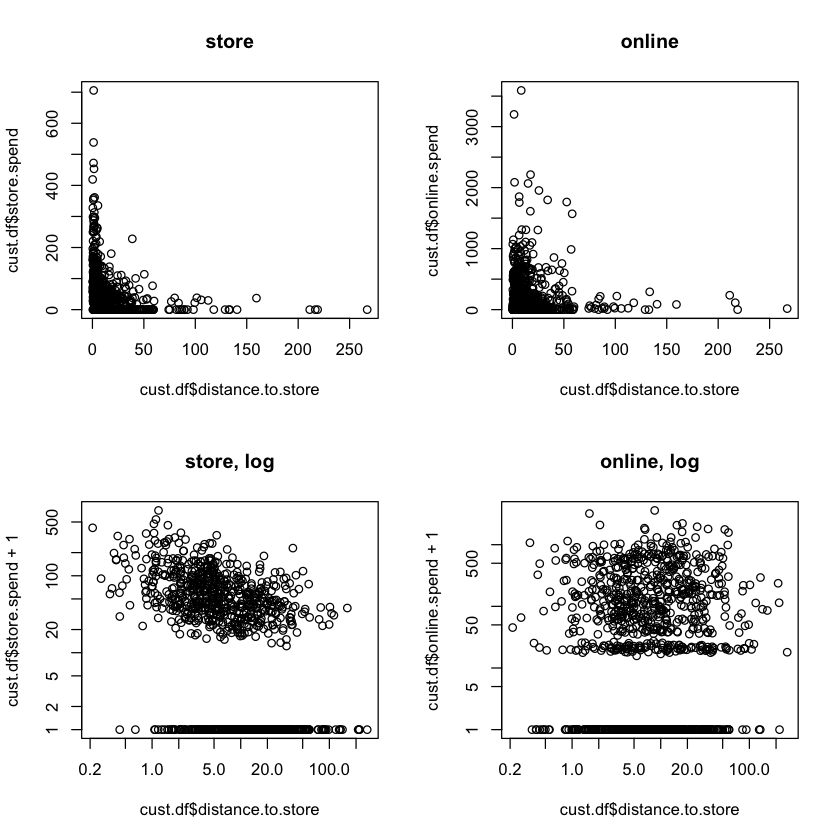

In [23]:
par(mfrow=c(2,2))
plot(cust.df$distance.to.store, cust.df$store.spend, main="store")
plot(cust.df$distance.to.store, cust.df$online.spend, main="online")
plot(cust.df$distance.to.store, cust.df$store.spend+1, log="xy", main="store, log")
plot(cust.df$distance.to.store, cust.df$online.spend+1, log="xy", main="online, log")

# 4.4 Scatterplot Matrics
## 4.4.1 pairs()

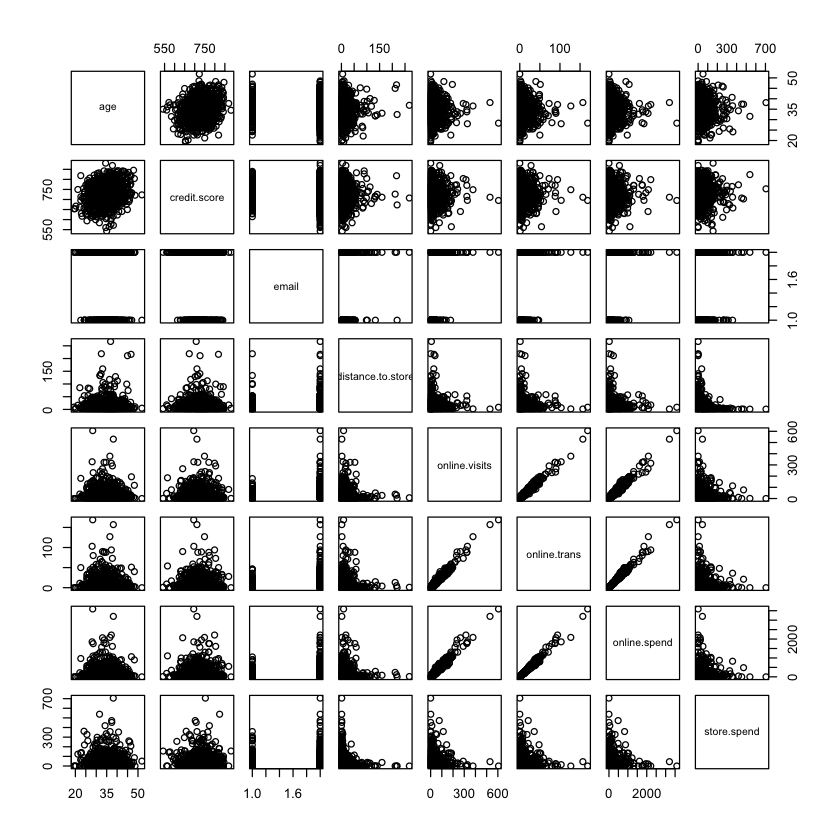

In [24]:
pairs(formula = ~age + credit.score + email + distance.to.store +
      online.visits + online.trans + online.spend + online.trans + store.spend,
     data=cust.df)

## 4.4.2 scatterplotmatrix()

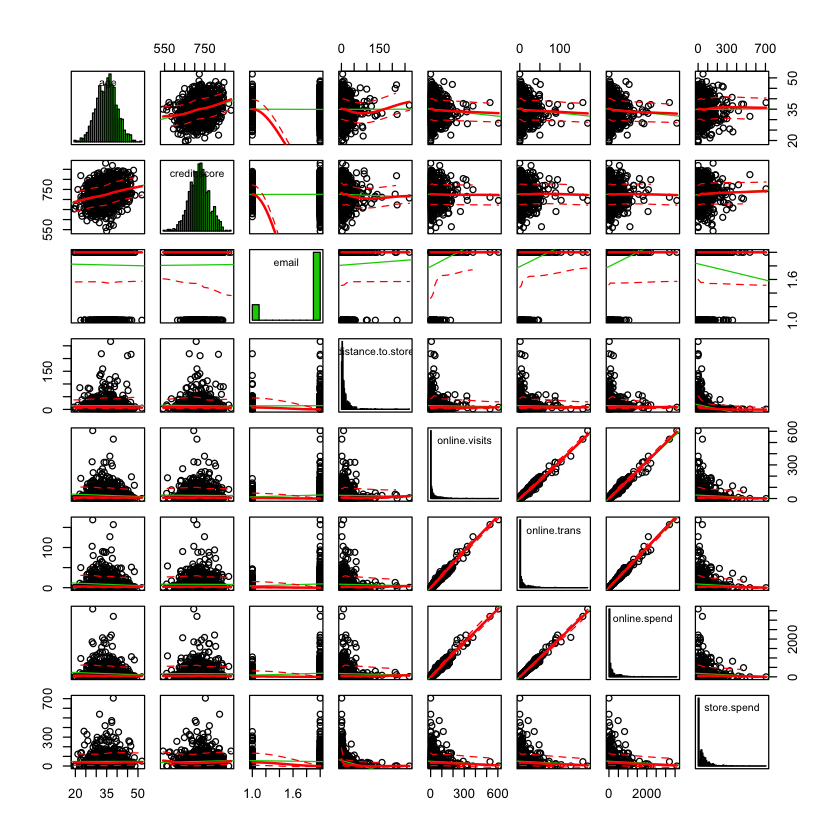

In [25]:
library(car)
scatterplotMatrix(formula= ~age + credit.score + email + distance.to.store +
      online.visits + online.trans + online.spend + online.trans + store.spend,
     data=cust.df, diagonal="histogram")

Loading required package: grid
Loading required package: lattice


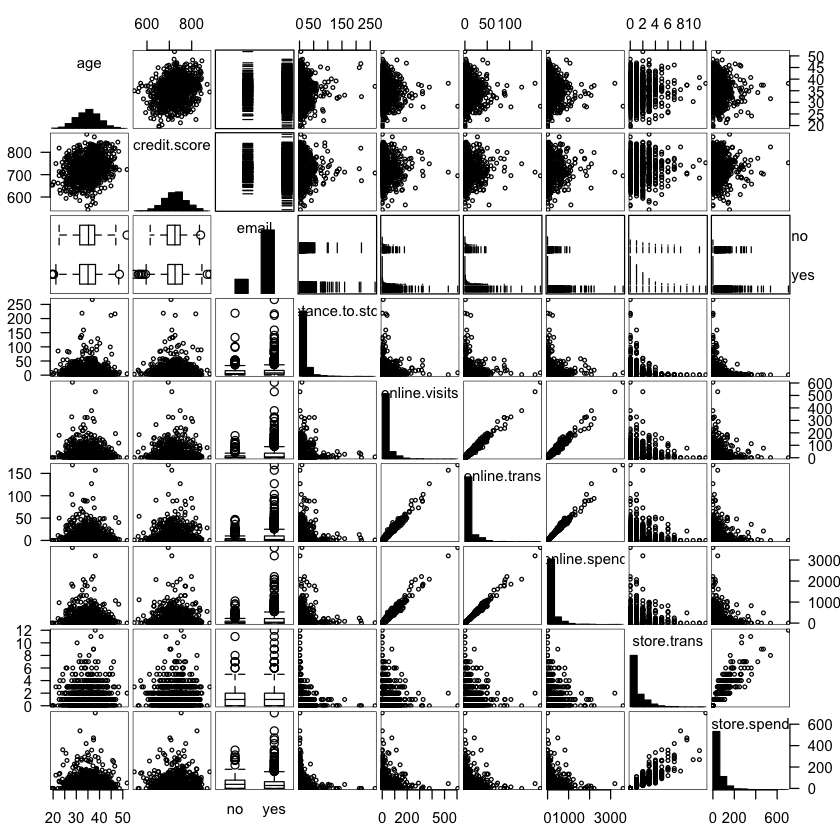

In [26]:
library(gpairs)
gpairs(cust.df[,c(2:10)])

# 4.5 Correlation Coefficients

In [27]:
cov(cust.df$age, cust.df$credit.score)

[1] 63.23443

In [28]:
cor(cust.df$age, cust.df$credit.score)

[1] 0.2545045

In [29]:
cov(cust.df$age, cust.df$credit.score) / (sd(cust.df$age)*sd(cust.df$credit.score))

[1] 0.2545045

## 4.5.1 Correlation Tests

In [30]:
cor.test(cust.df$age, cust.df$credit.score)


	Pearson's product-moment correlation

data:  cust.df$age and cust.df$credit.score
t = 8.3138, df = 998, p-value = 3.008e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1955974 0.3115816
sample estimates:
      cor 
0.2545045 


## Correlation Matrics

In [31]:
cor(cust.df[c(2,3,5:12)])

,age,credit.score,distance.to.store,online.visits,online.trans,online.spend,store.trans,store.spend,sat.service,sat.selection
age,1.000000000,0.254504457,0.00198741,-0.06138107,-0.06301994,-0.060685729,0.02422971,0.003841953,NA,NA
credit.score,0.254504457,1.000000000,-0.02326418,-0.01081827,-0.00501840,-0.006079881,0.04042416,0.042298123,NA,NA
distance.to.store,0.001987410,-0.023264183,1.00000000,-0.01460036,-0.01955166,-0.020405326,-0.27673229,-0.241494870,NA,NA
online.visits,-0.061381070,-0.010818272,-0.01460036,1.00000000,0.98732805,0.982406842,-0.03666932,-0.050685537,NA,NA
online.trans,-0.063019935,-0.005018400,-0.01955166,0.98732805,1.00000000,0.993346657,-0.04024588,-0.052244650,NA,NA
online.spend,-0.060685729,-0.006079881,-0.02040533,0.98240684,0.99334666,1.000000000,-0.04089133,-0.051690053,NA,NA
store.trans,0.024229708,0.040424158,-0.27673229,-0.03666932,-0.04024588,-0.040891332,1.00000000,0.892756851,NA,NA
store.spend,0.003841953,0.042298123,-0.24149487,-0.05068554,-0.05224465,-0.051690053,0.89275685,1.000000000,NA,NA
sat.service,NA,NA,NA,NA,NA,NA,NA,NA,1,NA
sat.selection,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


In [32]:
library(corrplot)
library(gplots)
corrplot.mixed(corr=cor(cust.df[,c(2,3,5:12)],use="complete.obs"),
              upper="ellipse", tl.pos="lt",
              col=colorpanel(50, "red", "gray60", "blue4"))

corrplot 0.84 loaded

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



ERROR: Error in corrplot(corr, type = "upper", method = upper, diag = TRUE, tl.pos = tl.pos, :  仮引数 "col" が複数の実引数にマッチしました 


## 4.5.3 Transforming Variables before Computing Correlations

In [ ]:
set.seed(49931)
x <- runif(1000, min=-10, max=10)
cor(x,x^2)

In [ ]:
cor(cust.df$distance.to.store, cust.df$store.spend)

In [ ]:
cor(1/cust.df$distance.to.store, cust.df$store.spend)

In [ ]:
cor(1/sqrt(cust.df$distance.to.store), cust.df$store.spend)

In [ ]:
plot(cust.df$distance.to.store, cust.df$store.spend)
plot(1/sqrt(cust.df$distance.to.store), cust.df$store.spend)

## 4.5.5 Box-Cox Transfomations

In [ ]:
library(car)
powerTransform(cust.df$distance.to.store)

In [ ]:
lambda <- coef(powerTransform(1/cust.df$distance.to.store))
bcPower(cust.df$distance.to.store, lambda)

In [ ]:
par(mfrow=c(1,2))
hist(cust.df$distance.to.store,
    xlab="Distance to Nearest Store", ylab="Count of Customer",
    main="Original Distribution")
hist(bcPower(cust.df$distance.to.store, lambda),
    xlab="Box-Cox Transform of Distance", ylab="Count of Customer",
    main="Transformed Distribution")

In [ ]:
powerTransform(cust.df$age)

In [ ]:
l.dist <- coef(powerTransform(cust.df$distance.to.store))
l.spend <- coef(powerTransform(cust.df$store.spend+1))
cor(bcPower(cust.df$distance.to.store, l.dist),
   bcPower(cust.df$store.spend+1, l.spend))

# 4.6 Exploring Associations in Survey Responses

In [ ]:
plot(cust.df$sat.service, cust.df$sat.selection,
    xlab="Customer Satisfaction with Service",
    ylab="Customer Satisfaction with Selection",
    main="Customers as of June 2014")

## 4.6.1 jitter()

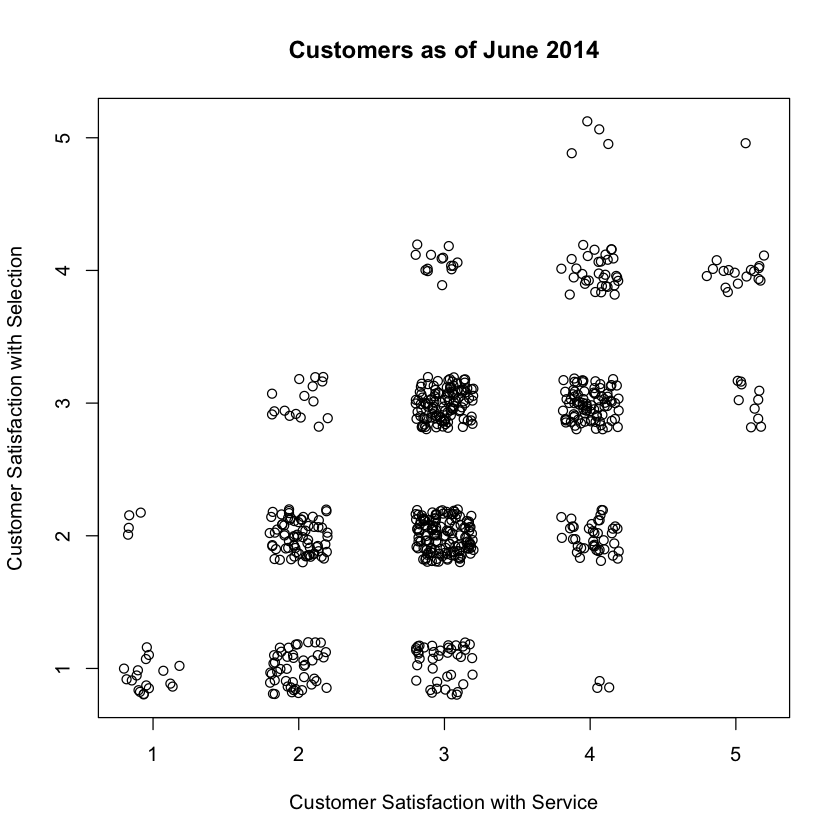

In [33]:
plot(jitter(cust.df$sat.service), jitter(cust.df$sat.selection),
    xlab="Customer Satisfaction with Service",
    ylab="Customer Satisfaction with Selection",
    main="Customers as of June 2014")

## 4.6.2 polychoric()

In [34]:
resp <- !is.na(cust.df$sat.service)
cor(cust.df$sat.service[resp],cust.df$sat.selection[resp])

[1] 0.5878558

In [36]:
library(psych)
polychoric(cbind(cust.df$sat.service[resp],
                cust.df$sat.selection[resp]))

Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“1 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”

Call: polychoric(x = cbind(cust.df$sat.service[resp], cust.df$sat.selection[resp]))
Polychoric correlations 
   C1   C2  
R1 1.00     
R2 0.62 1.00

 with tau of 
         1     2    3   4
[1,] -1.83 -0.72 0.54 1.7
[2,] -0.99  0.12 1.26 2.4